In [1]:
import os
import time
import math
import re
import struct
import traceback

import numpy as np
import matplotlib.pyplot as plt
# import cv2
import pandas as pd

from PIL import Image
import IPython.display as display

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'ETL6C_01',
 'ETL6C_02',
 'ETL6C_03',
 'ETL6C_04',
 'ETL6C_05',
 'ETL6C_06',
 'ETL6C_07',
 'ETL6C_08',
 'ETL6C_09',
 'ETL6C_10',
 'ETL6C_11',
 'ETL6C_12',
 'ETL6INFO',
 'etl_6_inspect_data.ipynb']

In [3]:
file_list = [
    'ETL6C_01',
    'ETL6C_02',
    'ETL6C_03',
    'ETL6C_04',
    'ETL6C_05',
    'ETL6C_06',
    'ETL6C_07',
    'ETL6C_08',
    'ETL6C_09',
    'ETL6C_10',
    'ETL6C_11',
    'ETL6C_12',
]

In [4]:
filename = file_list[0]
filename

'ETL6C_01'

In [5]:
RECORD_LENGTH = 2052 # bytes

In [6]:
with open(filename, 'rb') as data_file:
    record_string = data_file.read(RECORD_LENGTH)

In [7]:
print(type(record_string), len(record_string))

<class 'bytes'> 2052


In [8]:
UNPACK_STRING = '>H2sH6BI4H4B4x2016s4x'

In [9]:
record = struct.unpack(UNPACK_STRING, record_string)
print(type(record), len(record))

<class 'tuple'> 19


In [10]:
record_dict = {
    'index': record[0], # type: int
    'character_name': record[1], # type: bytes - ascii encoding (e.g. A, KA, 0, $)
    'sheet_index': record[2], # type: int
    'JIS_X_0201_CODE': record[3], # type: binary - https://en.wikipedia.org/wiki/JIS_X_0201
    'EBCDIC_CODE': record[4], # type: binary - https://en.wikipedia.org/wiki/EBCDIC
    'image_quality': record[5], # type: int - [0, 1, 2, 3] with 0 is clean
    'group_quality': record[6], # type: int - [0, 1, 2] with 0 is clean
    'writer_gender': record[7], # type: int - 1 is male, 2 is female. JIS X 0303 encoding?
    'writer_age': record[8], # type: int - 
    'serial_data_index': record[9], # type: int
    'industry_classification_code': record[10], # type: int - JIS X 0403
    'occupation_classification_code': record[11], # type: int - JIS X 0404
    'data_of_sheet_gathering': record[12], # type: int - data of sheet gathering (19)YYMM
    'date_of_scan': record[13], # type: int - date of scan (19)YYMM
    'x_pos': record[14], # type: int - x coordinate of scan position on sheet (>= 1)
    'y_pos': record[15], # type: int - y coordinate of scan position on sheet (>= 1)
    'minimum_intensity_level': record[16], # type: int - value in range (0-255)
    'maximum_scanned_level': record[17], # type: int - value in range (0-255)
    'image_data': record[18], # type: bytes
}

In [11]:
for key in record_dict.keys():
    print(key, type(record_dict[key]))

index <class 'int'>
character_name <class 'bytes'>
sheet_index <class 'int'>
JIS_X_0201_CODE <class 'int'>
EBCDIC_CODE <class 'int'>
image_quality <class 'int'>
group_quality <class 'int'>
writer_gender <class 'int'>
writer_age <class 'int'>
serial_data_index <class 'int'>
industry_classification_code <class 'int'>
occupation_classification_code <class 'int'>
data_of_sheet_gathering <class 'int'>
date_of_scan <class 'int'>
x_pos <class 'int'>
y_pos <class 'int'>
minimum_intensity_level <class 'int'>
maximum_scanned_level <class 'int'>
image_data <class 'bytes'>


In [12]:
record_dict['character_name']

b' A'

In [13]:
record_dict['character_name'].decode('ascii').strip()

'A'

In [14]:
width = 64
height = 63
img = Image.frombytes('F', (width, height), record_dict['image_data'], 'bit', 4)

In [15]:
type(img)

PIL.Image.Image

In [16]:
np_img = np.array(img)
np_img.shape

(63, 64)

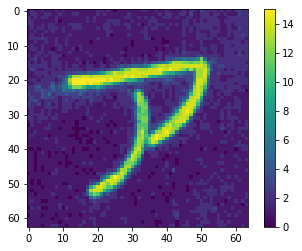

In [17]:
plt.imshow(np_img)
plt.colorbar()

In [18]:
record_count = {}
total_samples = 0
RECORD_LENGTH = 2052 # bytes
UNPACK_STRING = '>H2sH6BI4H4B4x2016s4x'

for filename in file_list:
    f = open(filename, 'rb')

    while True:
        record_string = f.read(RECORD_LENGTH)

        if len(record_string) < RECORD_LENGTH:
            # print(len(record_string))
            break
        total_samples += 1
        record = struct.unpack(UNPACK_STRING, record_string)

        record_dict = {
            'index': record[0], # type: int
            'character_name': record[1], # type: bytes - ascii encoding (e.g. A, KA, 0, $)
            'sheet_index': record[2], # type: int
            'JIS_X_0201_CODE': record[3], # type: binary - https://en.wikipedia.org/wiki/JIS_X_0201
            'EBCDIC_CODE': record[4], # type: binary - https://en.wikipedia.org/wiki/EBCDIC
            'image_quality': record[5], # type: int - [0, 1, 2, 3] with 0 is clean
            'group_quality': record[6], # type: int - [0, 1, 2] with 0 is clean
            'writer_gender': record[7], # type: int - 1 is male, 2 is female. JIS X 0303 encoding?
            'writer_age': record[8], # type: int - 
            'serial_data_index': record[9], # type: int
            'industry_classification_code': record[10], # type: int - JIS X 0403
            'occupation_classification_code': record[11], # type: int - JIS X 0404
            'data_of_sheet_gathering': record[12], # type: int - data of sheet gathering (19)YYMM
            'date_of_scan': record[13], # type: int - date of scan (19)YYMM
            'x_pos': record[14], # type: int - x coordinate of scan position on sheet (>= 1)
            'y_pos': record[15], # type: int - y coordinate of scan position on sheet (>= 1)
            'minimum_intensity_level': record[16], # type: int - value in range (0-255)
            'maximum_scanned_level': record[17], # type: int - value in range (0-255)
            'image_data': record[18], # type: bytes
        }

#         name = record_dict['character_name'].decode('ascii').strip()
        name = record_dict['character_name'].decode('ascii')

        if name in record_count.keys():
            record_count[name] += 1
        else:
            record_count[name] = 1

    f.close()

In [19]:
total_samples

159045

In [20]:
len(record_count.keys())

114

In [21]:
record_count

{' A': 1383,
 ' I': 1383,
 ' U': 1383,
 ' E': 1383,
 ' O': 1383,
 'KA': 1383,
 'KI': 1383,
 'KU': 1383,
 'KE': 1383,
 'KO': 1383,
 'SA': 1383,
 'SI': 1383,
 'SU': 1383,
 'SE': 1383,
 'SO': 1383,
 'TA': 1383,
 'TI': 1383,
 'TU': 1383,
 'TE': 1383,
 'TO': 1383,
 'NA': 1383,
 'NI': 1383,
 'NU': 1383,
 'NE': 1383,
 'NO': 1383,
 'HA': 1383,
 'HI': 1383,
 'HU': 1383,
 'HE': 1383,
 'HO': 1383,
 'MA': 1383,
 'MI': 1383,
 'MU': 1383,
 'ME': 1383,
 'MO': 1383,
 'YA': 1383,
 'YU': 1383,
 'YO': 1383,
 'RA': 1383,
 'RI': 1383,
 'RU': 1383,
 'RE': 1383,
 'RO': 1383,
 'WA': 1383,
 'WO': 1383,
 ' N': 1383,
 ',,': 1383,
 ',0': 1383,
 '(K': 1383,
 ')K': 1383,
 '0 ': 1383,
 '1 ': 1383,
 '2 ': 1383,
 '3 ': 1383,
 '4 ': 1383,
 '5 ': 1383,
 '6 ': 1383,
 '7 ': 1383,
 '8 ': 1383,
 '9 ': 1383,
 '+ ': 1383,
 '- ': 1383,
 'A ': 1383,
 'B ': 1383,
 'C ': 1383,
 'D ': 1383,
 'E ': 1383,
 'F ': 1383,
 'G ': 1383,
 'H ': 1383,
 'I ': 1383,
 'J ': 1383,
 'K ': 1383,
 'L ': 1383,
 'M ': 1383,
 'N ': 1383,
 'O ': 1383,

In [23]:
csv_filename = 'classes.tsv'
with open(csv_filename, mode='w', encoding='utf-8') as f:
    f.write('class\tnum_samples\n')
    for k in record_count.keys():
        log_str = f'{k}\t{record_count[k]}\n'
        f.write(log_str)
# sort classes
# pd_df = pd.read_csv(csv_filename, encoding='utf-8', sep='\t')
# pd_df = pd_df.sort_values(['class'])
# pd_df.to_csv(csv_filename, encoding='utf-8', index=False, sep='\t')